In [118]:
import pandas as pd 
df=pd.read_csv("tree.csv")

In [119]:
df


,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Warm,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Cloudy,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Cloudy,Warm,Indoor,No
6,7,Sunny,Cold,Outdoor,Yes


In [120]:
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Warm,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Cloudy,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [121]:
df=df.drop("Days",axis=1)

In [122]:
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Warm,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Cloudy,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Cloudy,Warm,Indoor,No
6,Sunny,Cold,Outdoor,Yes


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Outlook       7 non-null      object
 1   Temprature    7 non-null      object
 2   Routine       7 non-null      object
 3   Wear Jacket?  7 non-null      object
dtypes: object(4)
memory usage: 352.0+ bytes


In [124]:
y=df["Wear Jacket?"]

In [125]:
y


0    No 
1    Yes
2     No
3    Yes
4    Yes
5     No
6    Yes
Name: Wear Jacket?, dtype: object

In [126]:
x=df.drop("Wear Jacket?",axis=1)

In [127]:
x


,Outlook,Temprature,Routine
0,Sunny,Warm,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Cloudy,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Cloudy,Warm,Indoor
6,Sunny,Cold,Outdoor


# Prepocessing

In [128]:
#Encoding
from sklearn.preprocessing import LabelEncoder

In [129]:
le=LabelEncoder()

In [130]:
x.Outlook=le.fit_transform(df['Outlook'])
x.Temprature=le.fit_transform(df['Temprature'])
x.Routine=le.fit_transform(df['Routine'])


In [131]:
x

,Outlook,Temprature,Routine
0,1,1,0
1,0,0,0
2,0,1,1
3,0,0,1
4,0,0,1
5,0,1,0
6,1,0,1


#  Decision Tree 

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
clf=DecisionTreeClassifier()

In [134]:
clf.fit(x,y) #train full  dataset

DecisionTreeClassifier()

In [135]:
clf.predict([[1,0,0]]) #sunny=1 Cloudy=0 ;1=Warm cold=0; Outdoor=1 indoor=0;

array(['Yes'], dtype=object)

In [139]:
clf.predict([[0,0,0]]) #No= Not jacket wear;Yes=Wear Jacket;

array(['Yes'], dtype=object)

[Text(133.92000000000002, 181.2, 'X[1] <= 0.5\ngini = 0.571\nsamples = 7\nvalue = [2, 1, 4]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]')]

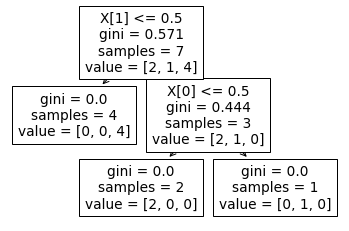

In [141]:
from sklearn import tree
tree.plot_tree(clf)

[Text(133.92000000000002, 181.2, 'X[1] <= 0.5\ngini = 0.571\nsamples = 7\nvalue = [2, 1, 4]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]')]

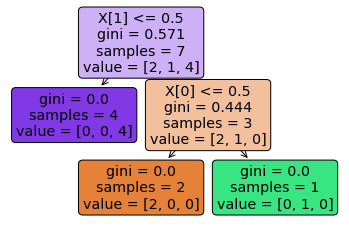

In [142]:
from sklearn import tree
tree.plot_tree(clf,filled=True,rounded=True)

In [146]:
x.columns

Index(['Outlook', 'Temprature', 'Routine'], dtype='object')

[Text(133.92000000000002, 181.2, 'Temprature <= 0.5\ngini = 0.571\nsamples = 7\nvalue = [2, 1, 4]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(200.88000000000002, 108.72, 'Outlook <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]')]

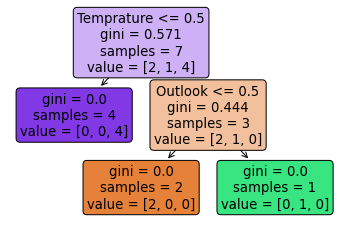

In [148]:
tree.plot_tree(clf,filled=True,rounded=True, feature_names=x.columns)

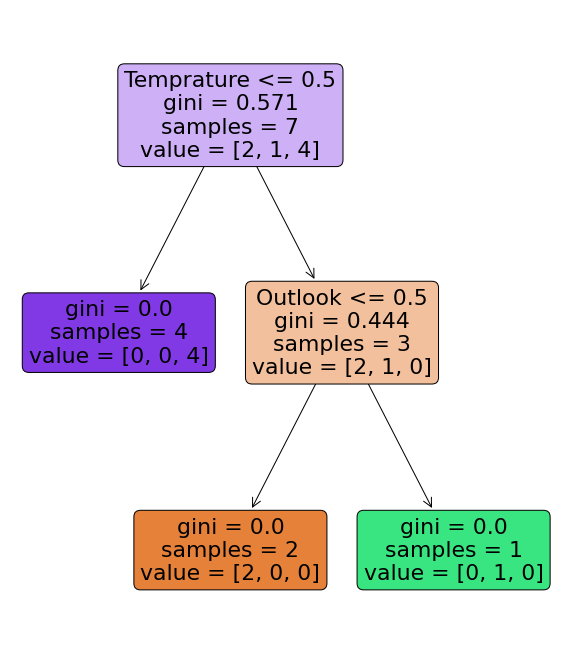

In [155]:
from sklearn import tree

import matplotlib.pyplot as plt
plt.figure(figsize=(10,12))
tree.plot_tree(clf,filled=True,rounded=True, feature_names=x.columns)
plt.savefig('tree.png')